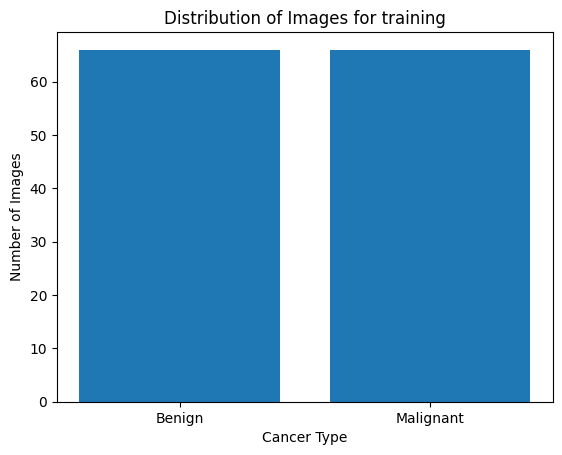

In [3]:
# visualize data
import matplotlib.pyplot as plt
import os
num_benign = len(os.listdir('/content/drive/MyDrive/Datasets/Dataset A/Bengin Cases'))
num_malignant = len(os.listdir('/content/drive/MyDrive/Datasets/Dataset A/Bengin Cases'))

counts = [ num_benign, num_malignant]
labels = ['Benign', 'Malignant']
plt.bar(labels, counts)
plt.title('Distribution of Images for training')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Images')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import matplotlib.pyplot as plt

In [6]:
train_dir = '/content/drive/MyDrive/Datasets/Dataset A'
val_dir = '/content/drive/MyDrive/Datasets/Dataset B'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_ds = train_datagen.flow_from_directory(train_dir, target_size=(224,224), color_mode='grayscale')
val_datagen = ImageDataGenerator(rescale=1./255)
val_ds = val_datagen.flow_from_directory(val_dir, target_size=(224,224),color_mode='grayscale')

Found 363 images belonging to 2 classes.
Found 318 images belonging to 2 classes.


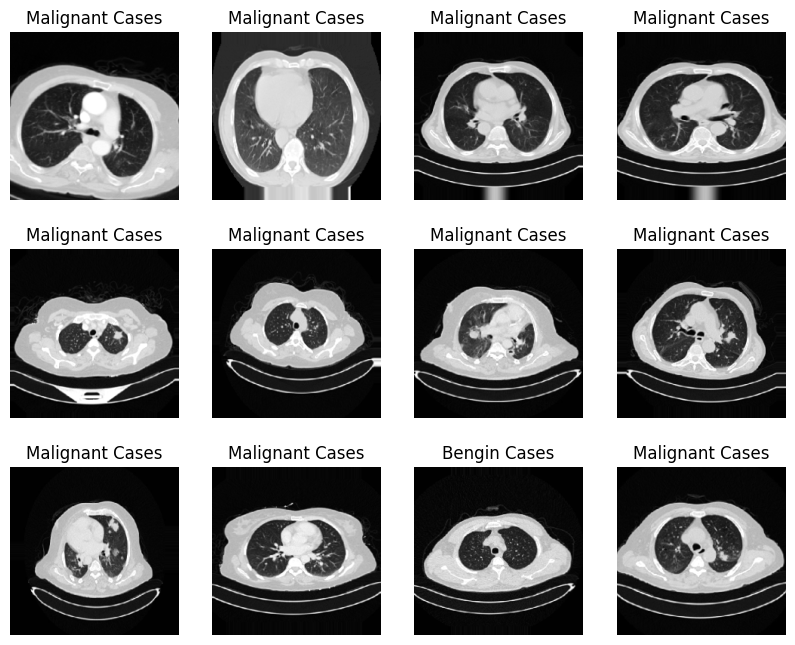

In [7]:
images, labels = next(train_ds)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    class_names = list(train_ds.class_indices.keys())
    label_index = labels[i].argmax()
    ax.set_title(class_names[label_index])
    ax.axis('off')
plt.show()

In [8]:
input_shape=(224, 224, 1)

# define model 1
input1 = Input(shape=input_shape)
conv1_1 = Conv2D(32, (3, 3), activation='relu')(input1)
maxpool1_1 = MaxPooling2D((2, 2))(conv1_1)
conv1_2 = Conv2D(64, (3, 3), activation='relu')(maxpool1_1)
maxpool1_2 = MaxPooling2D((2, 2))(conv1_2)
conv1_3 = Conv2D(128, (3, 3), activation='relu')(maxpool1_2)
maxpool1_3 = MaxPooling2D((2, 2))(conv1_3)
flatten1 = Flatten()(maxpool1_3)
dense1 = Dense(256, activation='relu')(flatten1)
output1 = Dense(2, activation='softmax')(dense1)

In [9]:
model1 = Model(inputs = input1, outputs = output1)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856 

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
12/12 [==============================] - 215s 19s/step - loss: 0.7726 - accuracy: 0.7713 - val_loss: 0.4862 - val_accuracy: 0.8302
Epoch 2/10
12/12 [==============================] - 54s 4s/step - loss: 0.4351 - accuracy: 0.8182 - val_loss: 0.4854 - val_accuracy: 0.8302
Epoch 3/10
12/12 [==============================] - 51s 4s/step - loss: 0.4052 - accuracy: 0.8209 - val_loss: 0.5460 - val_accuracy: 0.6792
Epoch 4/10
12/12 [==============================] - 51s 4s/step - loss: 0.3858 - accuracy: 0.8127 - val_loss: 0.5367 - val_accuracy: 0.8270
Epoch 5/10
12/12 [==============================] - 51s 4s/step - loss: 0.3666 - accuracy: 0.8209 - val_loss: 0.5446 - val_accuracy: 0.7956
Epoch 6/10
12/12 [==============================] - 62s 5s/step - loss: 0.3085 - accuracy: 0.8871 - val_loss: 0.6021 - val_accuracy: 0.8302
Epoch 7/10
12/12 [==============================] - 57s 5s/step - loss: 0.4084 - accuracy: 0.8375 - val_loss: 0.7701 - val_accuracy: 0.4528
Epoch 8/10
12/12 [

In [11]:
model1.save('lung_nodule.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 164ms/step


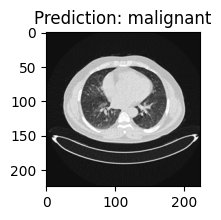

Accuracy: 0.64


In [15]:
from PIL import Image
from IPython.display import display
from ipywidgets import FileUpload
import io
import matplotlib.pyplot as plt
import numpy as np


# Create a file upload widget
upload = FileUpload()
display(upload)
model = load_model('lung_nodule.h5')

# Function to process and display the uploaded image
def process_and_display_uploaded_image(change):
    uploaded_data = next(iter(upload.value.values()))
    uploaded_image = Image.open(io.BytesIO(uploaded_data['content']))
#     display(uploaded_image)
    analyze_image(uploaded_image)

upload.observe(process_and_display_uploaded_image, names='value')

# Function to analyze the uploaded image
def analyze_image(img):
    # Process the image as needed
    img = img.resize((224, 224)).convert('L')
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Get the predicted class probabilities
    preds = model.predict(img_array)
    class_idx = np.argmax(preds[0])
    class_label = ['benign', 'malignant'][class_idx]
    accuracy = preds[0][class_idx]

    # Display the prediction
    plt.figure(figsize=(4, 2))
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {class_label}')
    plt.show()
    print(f'Accuracy: {accuracy:.2f}')